### Latent Derelicht Analysis is a probabilistic model, to obtain cluster assignments

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

Dataset: https://www.kaggle.com/therohk/million-headlines

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
headlines_df = pd.read_csv('./datasets/abcnews-date-text.csv')

In [132]:
headlines_df.shape

(1103663, 2)

In [133]:
NUM_SAMPLES = 10000

In [134]:
headlines_df = headlines_df.sample(NUM_SAMPLES, replace=False).reset_index(drop=True)

In [135]:
headlines_df.head(5)

,publish_date,headline_text
0,20050617,mentally ill asylum seeker to be deported
1,20050627,planets align in cosmic show
2,20150519,we need to have that conversation
3,20031123,queens offers up her congratulations
4,20090805,al shabaab the new al qaeda


In [136]:
X = headlines_df['headline_text']

In [137]:
X.head(10)

0            mentally ill asylum seeker to be deported
1                         planets align in cosmic show
2                    we need to have that conversation
3                 queens offers up her congratulations
4                          al shabaab the new al qaeda
5                     abc big winner at clarion awards
6        union welcomes consultation on planned school
7                   boat on fire at jacobs well marina
8    troubled tomic dumped by management company: r...
9                cheap imports threaten barra industry
Name: headline_text, dtype: object

In [138]:
count_vectorizer = CountVectorizer(ngram_range=(2, 2))

transformed_vector = count_vectorizer.fit_transform(X)

In [139]:
transformed_vector.shape

(10000, 43602)

In [140]:
feature_names = count_vectorizer.get_feature_names()

In [141]:
len(feature_names)

43602

In [142]:
feature_names[1000:1005]

['after alice',
 'after all',
 'after alleged',
 'after allegedly',
 'after another']

In [143]:
NUM_TOPICS = 20

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)

lda = lda_model.fit_transform(transformed_vector)

In [144]:
lda.shape

(10000, 20)

In [145]:
lda[:2]

array([[0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286,
        0.00714286, 0.00714286, 0.86428571, 0.00714286, 0.00714286,
        0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286,
        0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.81      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ]])

In [146]:
sum(lda[0])

1.0

Variational parameters for topic word distribution. lda_model.components_[t, w] can be viewed as pseudocount that represents the number of times the word w was assigned to topic t

In [147]:
lda_model.components_.shape

(20, 43602)

In [148]:
def print_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(lda_model.components_):

        if topic_id == identifier:
            print("Topic %d:" % (topic_id))

            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            print(" ".join(top_feature_names))

In [149]:
for i in range(14):
    print_topic(i, top_words=3)

Topic 0:
on the to get to save
Topic 1:
to face face court national rural
Topic 2:
to be abc business out of
Topic 3:
urged to killed in jailed for
Topic 4:
of the in the top of
Topic 5:
calls for set to search for
Topic 6:
calls for on the to be
Topic 7:
set to to be talks to
Topic 8:
to help call for ahead of
Topic 9:
the drum urged to charged with
Topic 10:
out of to be urged to
Topic 11:
accused of guilty of to be
Topic 12:
call for in the urged to
Topic 13:
to boost in car set to


In [150]:
topics = []

for i in range(NUM_SAMPLES):
    topics.append(lda[i].argmax())

In [151]:
headlines_df['topic'] = topics

headlines_df.head()

,publish_date,headline_text,topic
0,20050617,mentally ill asylum seeker to be deported,7
1,20050627,planets align in cosmic show,11
2,20150519,we need to have that conversation,3
3,20031123,queens offers up her congratulations,10
4,20090805,al shabaab the new al qaeda,8


In [152]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

In [153]:
lda_2d_tsne = tsne.fit_transform(lda)

In [154]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(10000, 2)

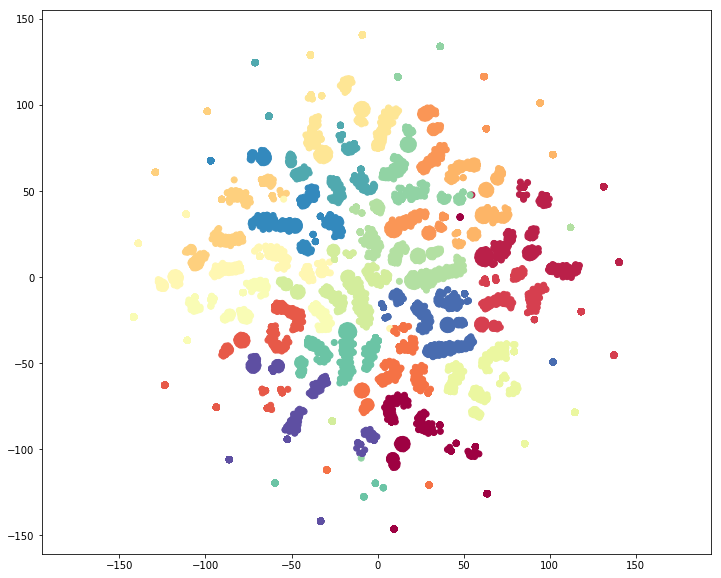

In [155]:
plt.subplots(figsize = (12, 10))
plt.axis('equal');

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c = headlines_df['topic'], cmap = plt.cm.Spectral)